In [54]:
import pandas as pd
df = pd.read_csv('../../asp_original', index_col=0)

In [31]:
df

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,waterfrontpoorqualtiy,waterfrontrestrictedaccess,waterfrontaccessrights,waterfrontproximityinfluence,tidelandshoreland,lotdepthfactopr,trafficnoise,airportnoise,powerlines,othernuisances
0,2019-10-05,690000.0,11,6,3,N,N,1,8,98133.0,...,0,0,0,N,N,0.0,0,1,0,N
1,2019-01-04,381000.0,11,6,3,N,N,1,8,98001.0,...,0,0,0,N,N,0.0,0,0,0,N
2,2019-11-09,845000.0,11,6,3,N,N,1,8,98117.0,...,0,0,0,N,N,0.0,0,1,0,N
3,2019-08-07,350000.0,11,6,3,N,N,1,8,98148.0,...,0,0,0,N,N,0.0,0,2,0,N
4,2019-08-12,778455.0,11,6,3,N,N,1,8,98115.0,...,0,0,0,N,N,0.0,0,2,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,2019-02-25,1188735.0,11,6,3,N,N,1,8,98103.0,...,0,0,0,N,N,0.0,0,0,0,N
18178,2019-07-28,1042800.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
18179,2019-07-02,427212.0,11,6,3,N,N,1,8,NaN,...,0,0,0,N,N,0.0,0,0,0,N
18180,2019-12-19,867000.0,11,6,3,N,N,1,8,98199.0,...,0,0,0,N,N,0.0,0,0,0,N


In [55]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style('darkgrid')

In [56]:
df.columns

Index(['documentdate', 'saleprice', 'propertytype', 'principaluse',
       'saleinstrument', 'currentuseland', 'historicproperty', 'salereason',
       'propertyclass', 'zipcode', 'streettype', 'stories', 'buildinggrade',
       'squarefeettotalliving', 'squarefeettotalbasement',
       'squarefeetgarageattached', 'squarefeetopenporch', 'squarefeetdeck',
       'bedrooms', 'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
       'fireplacesinglestory', 'fireplacemultiplestory',
       'fireplacefreestanding', 'fireplaceadditional', 'yearbuilt',
       'yearrenovated', 'percentcomplete', 'obsolescence',
       'percentnetcondition', 'condition', 'township', 'propertytype.1',
       'districtname', 'levycode', 'lotsquarefootage', 'watersystem', 'access',
       'topography', 'viewmtranier', 'viewolympics', 'viewcascades',
       'viewterritorial', 'viewseattleskyline', 'viewpugetsound',
       'viewlakewashington', 'viewlakesammamish', 'viewsmalllakerivercreek',
       'viewotherview', 

In [26]:
#df.drop(columns=['documentdate', 'propertytype', 'principaluse', 'saleinstrument', 'salereason', 'propertyclass'], inplace=True)

In [57]:
df1 = df[['saleprice', 'squarefeettotalliving', 'squarefeettotalbasement', 'squarefeetgarageattached', 
    'squarefeetopenporch', 'squarefeetdeck', 'bedrooms', 'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
    'condition', 'lotsquarefootage']].copy()

In [58]:
df1['baths'] = df1['bathfullcount'] + (0.75*df1['bath3qtrcount']) + (0.5*df1['bathhalfcount'])

In [59]:
df1['ratio_living_lot'] = df1['squarefeettotalliving'] / df1['lotsquarefootage']

In [60]:
df1.drop(columns=['bathhalfcount', 'bath3qtrcount', 'bathfullcount'], inplace=True)

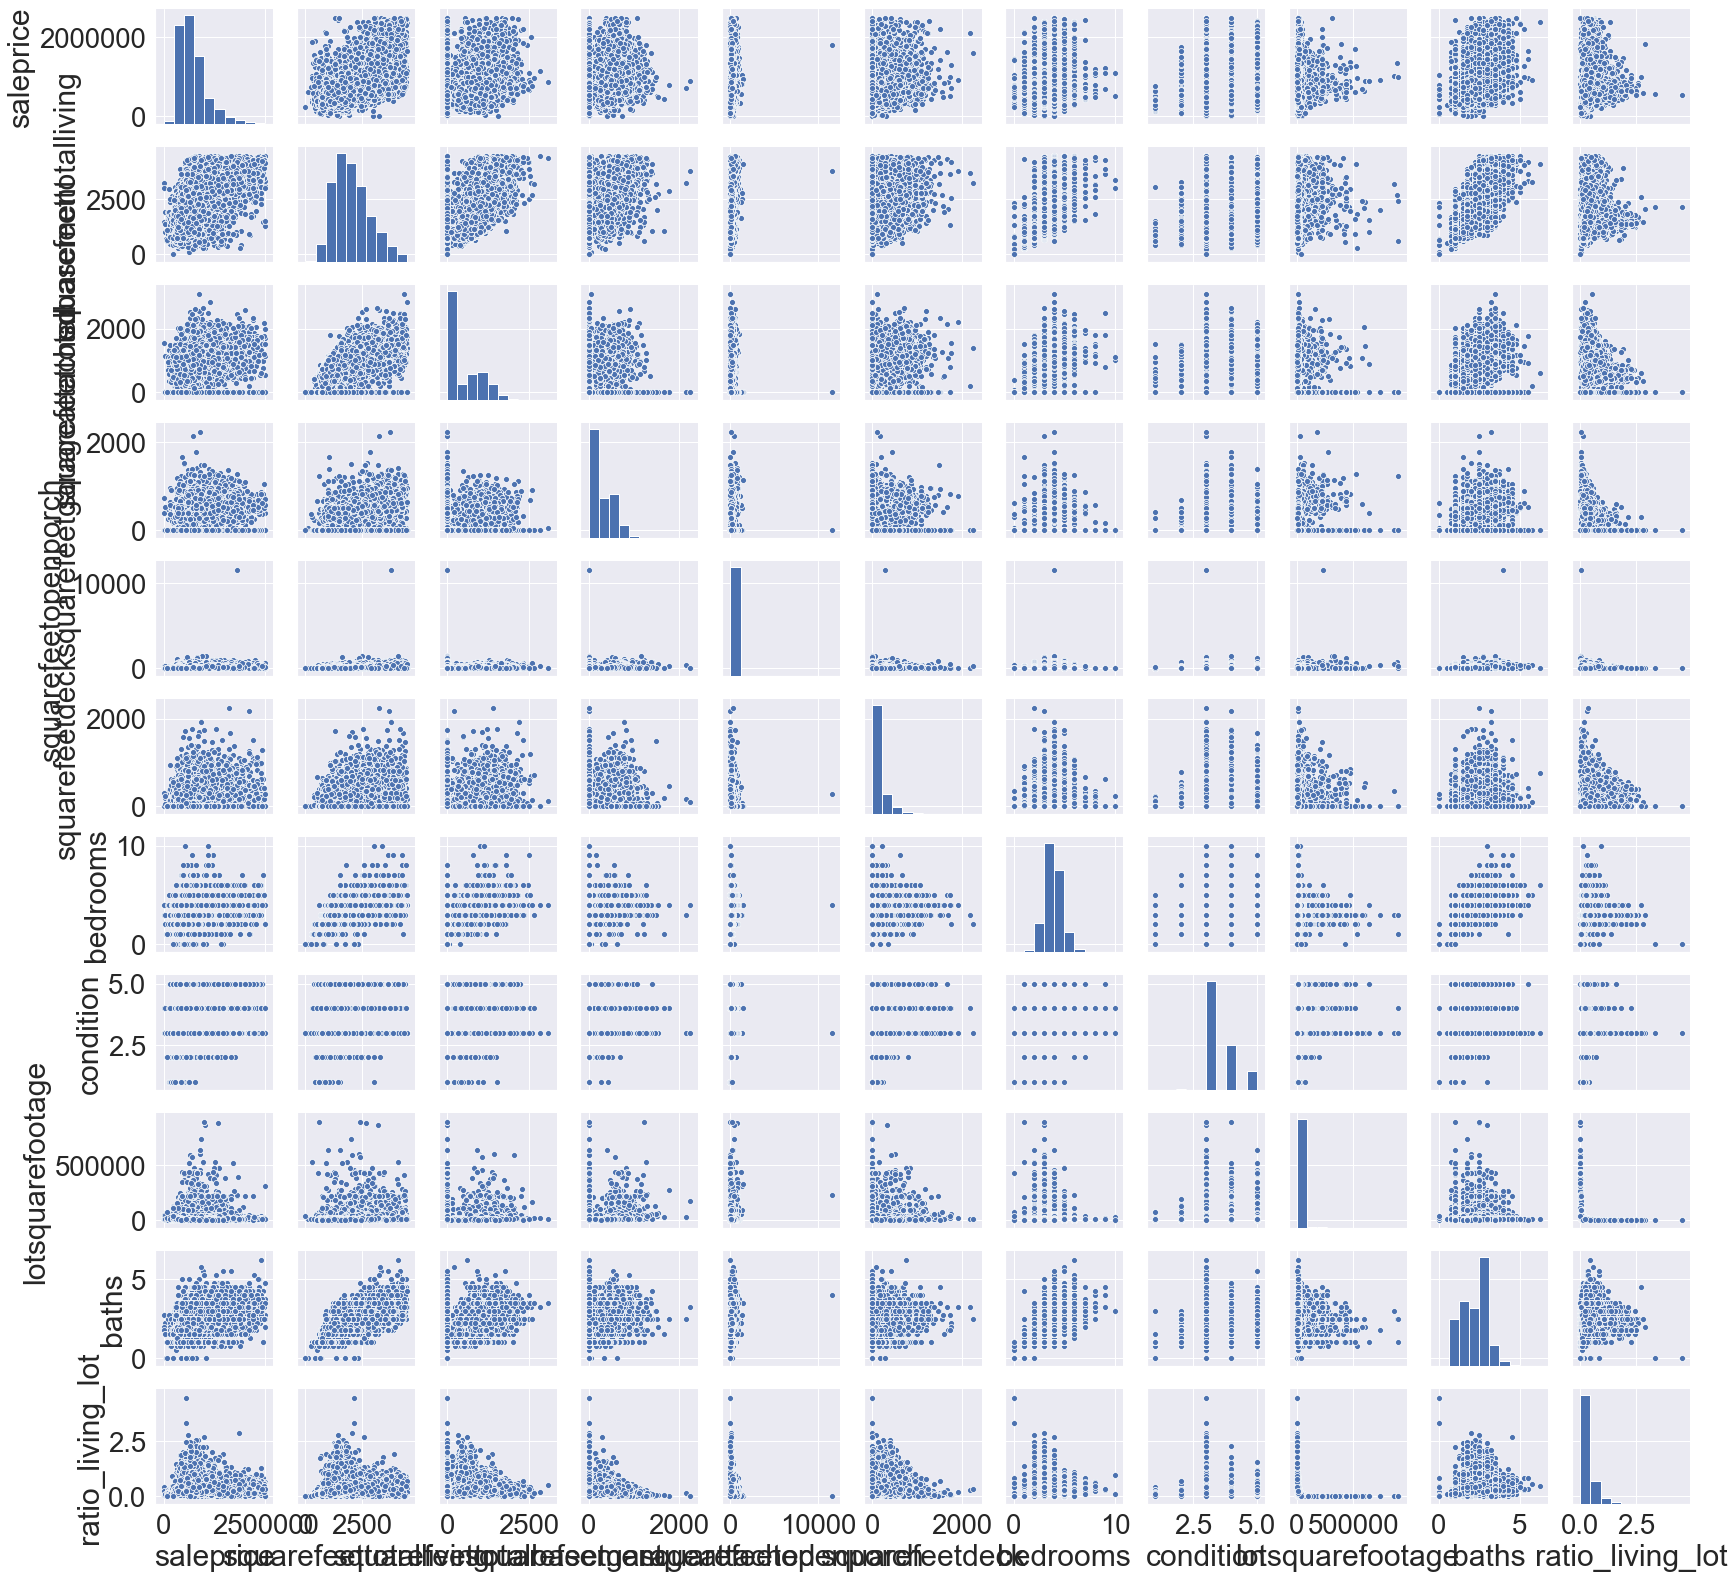

In [61]:
sns.pairplot(df1)
sns.set(font_scale = 2.5)
fig.tight_layout;

In [62]:
df1.corr()

,saleprice,squarefeettotalliving,squarefeettotalbasement,squarefeetgarageattached,squarefeetopenporch,squarefeetdeck,bedrooms,condition,lotsquarefootage,baths,ratio_living_lot
saleprice,1.000000,0.596841,0.225156,0.117777,0.206762,0.202800,0.285509,-0.039693,0.059701,0.462561,0.170719
squarefeettotalliving,0.596841,1.000000,0.239665,0.426611,0.290573,0.204983,0.634902,-0.091055,0.122644,0.744508,0.071063
squarefeettotalbasement,0.225156,0.239665,1.000000,-0.397033,-0.061423,0.253516,0.191504,0.111514,-0.017141,0.143765,0.056125
squarefeetgarageattached,0.117777,0.426611,-0.397033,1.000000,0.161780,-0.009470,0.267568,-0.103538,0.120103,0.345036,-0.200599
squarefeetopenporch,0.206762,0.290573,-0.061423,0.161780,1.000000,-0.034366,0.146284,-0.065374,0.150508,0.217824,-0.026499
squarefeetdeck,0.202800,0.204983,0.253516,-0.009470,-0.034366,1.000000,0.080825,0.089595,0.112396,0.155304,-0.005361
bedrooms,0.285509,0.634902,0.191504,0.267568,0.146284,0.080825,1.000000,0.016325,-0.000031,0.559888,0.001729
condition,-0.039693,-0.091055,0.111514,-0.103538,-0.065374,0.089595,0.016325,1.000000,0.026795,-0.132022,-0.229040
lotsquarefootage,0.059701,0.122644,-0.017141,0.120103,0.150508,0.112396,-0.000031,0.026795,1.000000,0.028723,-0.253406
baths,0.462561,0.744508,0.143765,0.345036,0.217824,0.155304,0.559888,-0.132022,0.028723,1.000000,0.259763


In [66]:
# Create a dataframe with only the target and the chosen high-positive corellation feature
model1_df = df1[['saleprice', 'squarefeettotalliving']].copy()

# Fit the model on the dataframe composed of the two features
formula = 'saleprice ~ squarefeettotalliving'
model1 = ols(formula=formula, data=model1_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:13:24   Log-Likelihood:            -2.5485e+05
No. Observations:               18182   AIC:                         5.097e+05
Df Residuals:                   18180   BIC:                         5.097e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.743e+05   5990.934     29.100      0.000    1.63e+05    1.86e+05
squarefeettotalliving   272.4830      2.717    100.297      0.000     267.158     277.808
==============================================================================
Omnibus:                     3786.589   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9616.674
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       5.736   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
def check_for_assumptions(modelname):
    rsquared = modelname.rsquared
    params = modelname.params
    print(f'Rsquared of Model: {rsquared}')
    print('----------')
    print('Beta values of Model:')
    print(params)
    rainbow_statistic, rainbow_p_value = linear_rainbow(model1)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    residuals = modelname.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax[0])
    ax[0].set_title('QQ-Plot of Residuals')
    ax[1].scatter(modelname.predict(), modelname.resid)
    sns.set(font_scale = 1)
    ax[1].set_title('Homoscadasicity Assumption')
    plt.xlabel('Model Predictions')
    plt.ylabel('Model Residuals')
    ax[1].plot(modelname.predict(), [0 for i in range(len(df))], color = 'red')
    fig.tight_layout
    return plt.show()

Rsquared of Model: 0.356219569182047
----------
Beta values of Model:
Intercept                174335.332720
squarefeettotalliving       272.482958
dtype: float64
Rainbow statistic: 1.108827148511401
Rainbow p-value: 4.255202093655189e-07


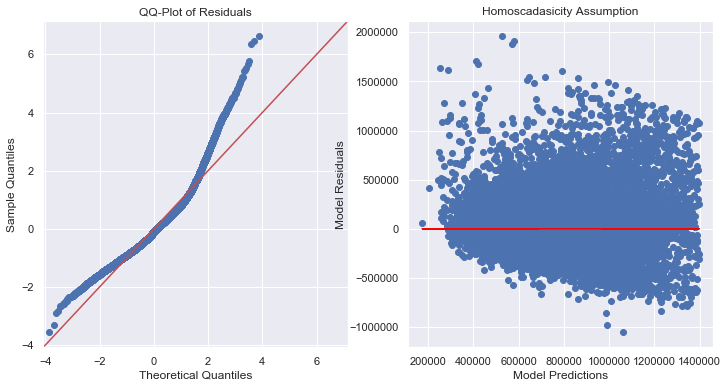

In [84]:
check_for_assumptions(model1)